In [1]:
import numpy as np
import cv2
import os

### KNN Code

In [2]:
def distance(v1,v2):
    return np.sqrt(((v1-v2)**2).sum())  

def knn(train, test, k = 5):
    dist = []
    
    for i in range(train.shape[0]):
        # Get the vector and Labels
        ix = train[i, :-1]
        iy = train[i, -1]
        #Compute the distance from test point
        d = distance(test, ix)
        dist.append([d, iy])
    #Sort based on distance from test point
    dk = sorted(dist, key = lambda x:x[0])[:k]
    #retrieve only the labels
    labels = np.array(dk)[:, -1]
    # Get frequency of each labels
    output  = np.unique(labels, return_counts = True)
    # Find max frequency and corresponding label
    index = np.argmax(output[1])
    return output[0][index]

In [ ]:
# Init Camera
cap = cv2.VideoCapture(0)

# Face Detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
skip = 0
dataset_path='./datasets/'
face_data = []
labels = []

class_id = 0
names = {} #mapping btw id and name

## Data Prepration

In [ ]:
for fx in os.listdir(dataset_path):
    if fx.endswith('.npy'):
        names[class_id] = fx[:-4]
        print('Loaded: '+fx)
        data_item = np.load(dataset_path+fx)
        face_data.append(data_item)
        
        #create labels for the class
        target = class_id*np.ones((data_item.shape[0],))
        class_id+=1
        labels.append(target)

face_dataset = np.concatenate(face_data, axis = 0)
face_labels = np.concatenate(labels, axis = 0).reshape((-1,1))

print(face_dataset.shape)
print(face_labels.shape)

trainset = np.concatenate((face_dataset, face_labels), axis = 1)
print(trainset.shape)

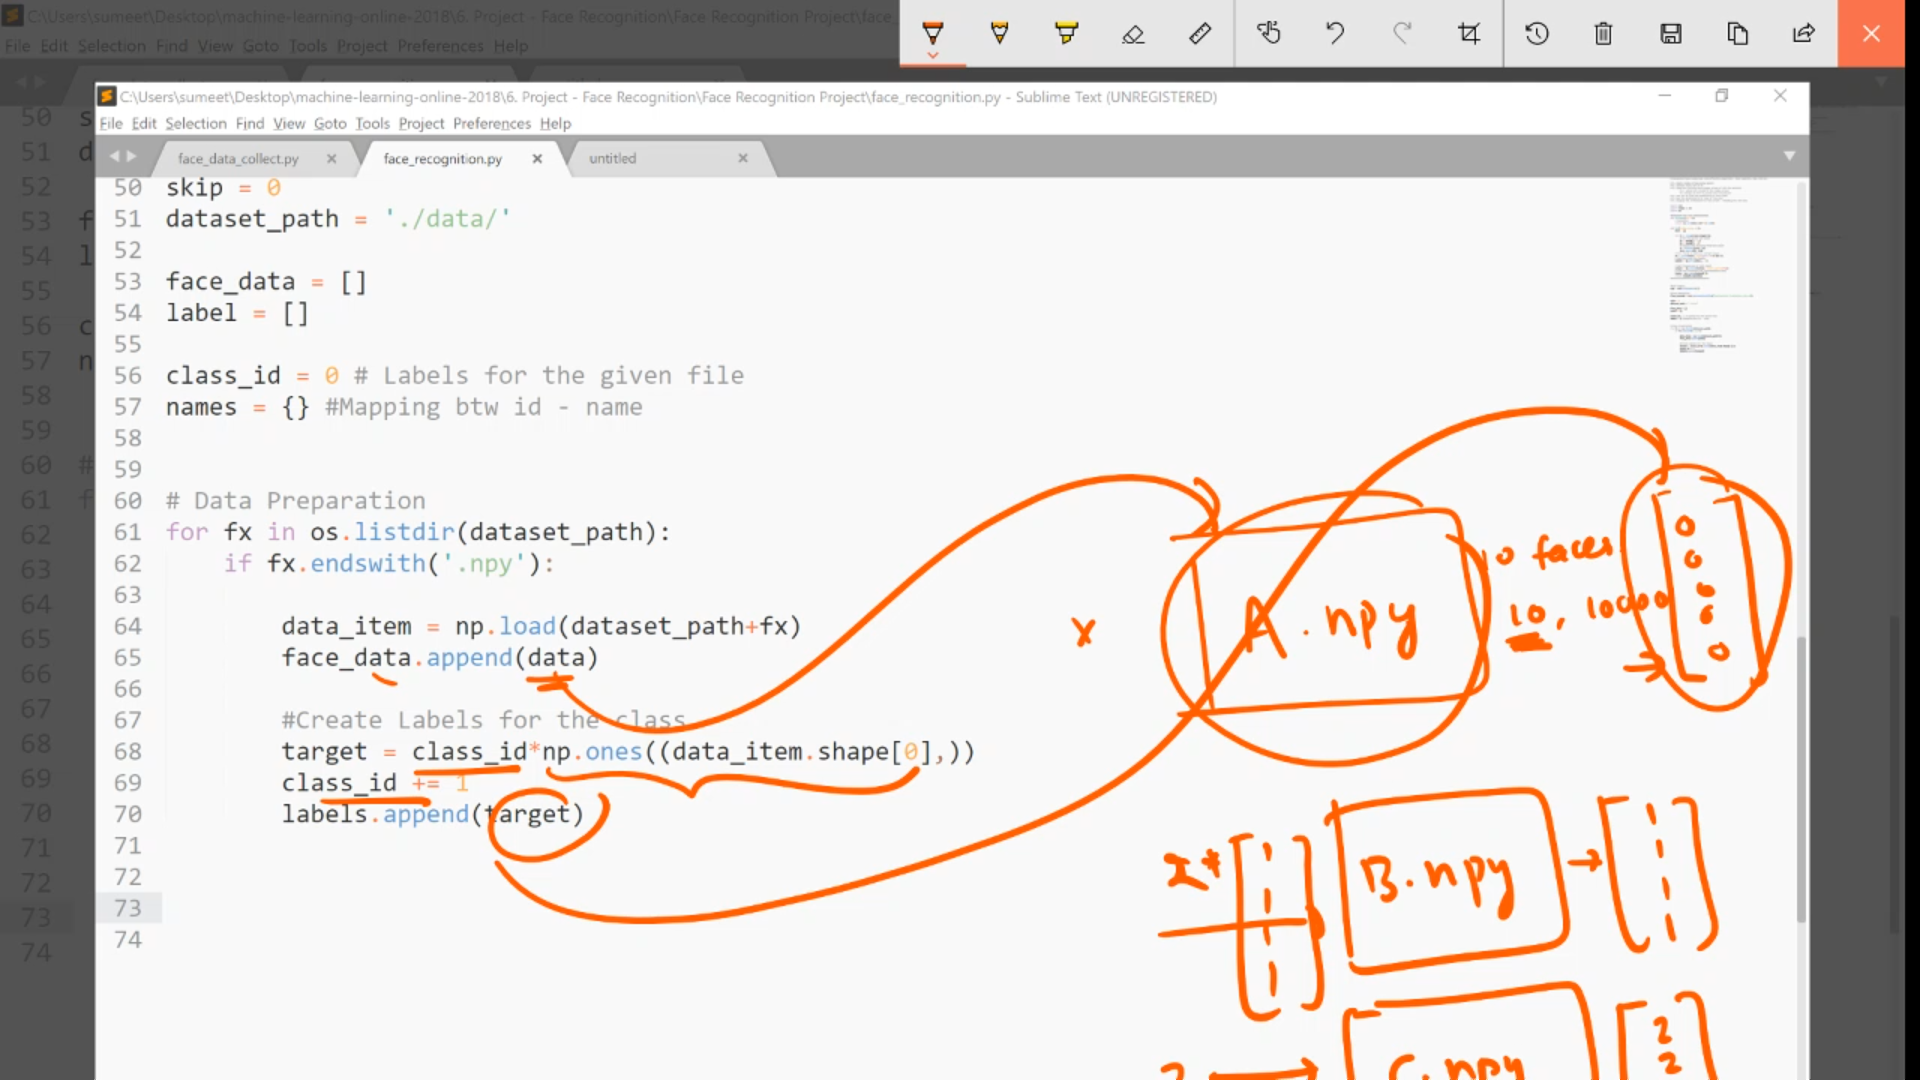

## Testing Part

In [ ]:
while True:
    ret, frame = cap.read()
    
    if ret == False:
        continue


    # Grayscaled
    faces = face_cascade.detectMultiScale(frame,1.3,5)
    if(len(faces)==0):
    		continue
    
    for face in faces:
        x,y,w,h = face
        # Get the face of ROI
        offset = 10
        face_section = frame[y - offset:y+h+offset, x - offset:x+w+offset]
        face_section = cv2.resize(face_section,(100,100))
        # predicted label (out)
        out = knn(trainset,face_section.flatten())
        
        # Display on the screen the name and rectangle around it
        pred_name = names[int(out)]
        cv2.putText(frame, pred_name,(x,y-10), cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,255),2)
    cv2.imshow('faces', frame)
    
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
        

In [ ]:
# COPIED CODE FROM HERE

In [ ]:
# def distance(v1, v2):
# 	# Eucledian 
# 	return np.sqrt(((v1-v2)**2).sum())

# def knn(train, test, k=5):
# 	dist = []
	
# 	for i in range(train.shape[0]):
# 		# Get the vector and label
# 		ix = train[i, :-1]
# 		iy = train[i, -1]
# 		# Compute the distance from test point
# 		d = distance(test, ix)
# 		dist.append([d, iy])
# 	# Sort based on distance and get top k
# 	dk = sorted(dist, key=lambda x: x[0])[:k]
# 	# Retrieve only the labels
# 	labels = np.array(dk)[:, -1]
	
# 	# Get frequencies of each label
# 	output = np.unique(labels, return_counts=True)
# 	# Find max frequency and corresponding label
# 	index = np.argmax(output[1])
# 	return output[0][index]

In [ ]:
# #Init Camera
# cap = cv2.VideoCapture(0)

# # Face Detection
# face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

# skip = 0
# dataset_path = './datasets/'

# face_data = [] 
# labels = []

# class_id = 0 # Labels for the given file
# names = {} #Mapping btw id - name

In [ ]:
# # Data Preparation
# for fx in os.listdir(dataset_path):
# 	if fx.endswith('.npy'):
# 		#Create a mapping btw class_id and name
# 		names[class_id] = fx[:-4]
# 		print("Loaded "+fx)
# 		data_item = np.load(dataset_path+fx)
# 		face_data.append(data_item)

# 		#Create Labels for the class
# 		target = class_id*np.ones((data_item.shape[0],))
# 		class_id += 1
# 		labels.append(target)

# face_dataset = np.concatenate(face_data,axis=0)
# face_labels = np.concatenate(labels,axis=0).reshape((-1,1))

# print(face_dataset.shape)
# print(face_labels.shape)

# trainset = np.concatenate((face_dataset,face_labels),axis=1)
# print(trainset.shape)


In [ ]:
# while True:
# 	ret,frame = cap.read()
# 	if ret == False:
# 		continue

# 	faces = face_cascade.detectMultiScale(frame,1.3,5)
# 	if(len(faces)==0):
# 		continue

# 	for face in faces:
# 		x,y,w,h = face

# 		#Get the face ROI
# 		offset = 10
# 		face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
# 		face_section = cv2.resize(face_section,(100,100))

# 		#Predicted Label (out)
# 		out = knn(trainset,face_section.flatten())

# 		#Display on the screen the name and rectangle around it
# 		pred_name = names[int(out)]
# 		cv2.putText(frame,pred_name,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2,cv2.LINE_AA)
# 		cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)

# 	cv2.imshow("Faces",frame)

# 	key = cv2.waitKey(1) & 0xFF
# 	if key==ord('q'):
# 		break

# cap.release()
# cv2.destroyAllWindows()



